# Deep Learning 3rd Assignment - Part a

In this section you should implement Adam algorithm with numpy on the following objective function:
\begin{equation}
x^2 + y^2
\end{equation}
Try and analyze the performance of this algorithm with different values for beta1 and beta2.

In [12]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

In [13]:
# objective function
def objective(x, y):
	return x**2.0 + y**2.0

In [14]:
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

In [15]:
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
  # generate an initial point
  x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  score = objective(x[0], x[1])
  # initialize first and second moments
  m = [0.0 for _ in range(bounds.shape[0])]
  v = [0.0 for _ in range(bounds.shape[0])]
  # run the gradient descent updates
  for t in range(n_iter):
    # calculate gradient g(t)
    g = derivative(x[0], x[1])
    # build a solution one variable at a time
    for i in range(x.shape[0]):
      # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
      m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
      # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
      v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
      # mhat(t) = m(t) / (1 - beta1(t))
      mhat = m[i] / (1.0 - beta1**(t+1))
      # vhat(t) = v(t) / (1 - beta2(t))
      vhat = v[i] / (1.0 - beta2**(t+1))
      # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
      x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
    # evaluate candidate point
    score = objective(x[0], x[1])
    # report progress
    #print('>%d f(%s) = %.5f' % (t, x, score))
  return [x, score]

In [16]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 1000
# steps size
alpha = 0.001
# factor for average gradient and average squared gradient
beta_list = [[0.9, 0.9],
        [0.99, 0.9],
        [0.999, 0.9],
        [0.9, 0.99],
        [0.99, 0.99],
        [0.999, 0.99],
        [0.9, 0.999],
        [0.99, 0.999],
        [0.999, 0.999],]
print('Learning_rate: %s' % (alpha))
print('\n\n')
for betas in beta_list:
  best, score = adam(objective, derivative, bounds, n_iter, alpha, betas[0], betas[1])
  print('For beta1: ' + str(betas[0]) + ' and ' + 'beta2: ' + str(betas[1]) + ': ')
  print('f(%s) = %f' % (best, score))
  print('---------------------------------------------')
  print()

Learning_rate: 0.001



For beta1: 0.9 and beta2: 0.9: 
f([ 4.26158250e-05 -1.73075024e-05]) = 0.000000
---------------------------------------------

For beta1: 0.99 and beta2: 0.9: 
f([ 0.08044519 -0.00282757]) = 0.006479
---------------------------------------------

For beta1: 0.999 and beta2: 0.9: 
f([0.36538754 0.43164406]) = 0.319825
---------------------------------------------

For beta1: 0.9 and beta2: 0.99: 
f([-2.96270491e-04 -5.36789201e-14]) = 0.000000
---------------------------------------------

For beta1: 0.99 and beta2: 0.99: 
f([ 0.00088791 -0.00028316]) = 0.000001
---------------------------------------------

For beta1: 0.999 and beta2: 0.99: 
f([-0.0524686  -0.10088718]) = 0.012931
---------------------------------------------

For beta1: 0.9 and beta2: 0.999: 
f([-0.03549142  0.10466613]) = 0.012215
---------------------------------------------

For beta1: 0.99 and beta2: 0.999: 
f([-0.16632807  0.00290279]) = 0.027673
-------------------------------------------

In [18]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 1000
# steps size
alpha = 0.01
# factor for average gradient and average squared gradient
beta_list = [[0.9, 0.9],
        [0.99, 0.9],
        [0.999, 0.9],
        [0.9, 0.99],
        [0.99, 0.99],
        [0.999, 0.99],
        [0.9, 0.999],
        [0.99, 0.999],
        [0.999, 0.999],]
print('Learning_rate: %s' % (alpha))
print('\n\n')
for betas in beta_list:
  best, score = adam(objective, derivative, bounds, n_iter, alpha, betas[0], betas[1])
  print('For beta1: ' + str(betas[0]) + ' and ' + 'beta2: ' + str(betas[1]) + ': ')
  print('f(%s) = %f' % (best, score))
  print('---------------------------------------------')
  print()

Learning_rate: 0.01



For beta1: 0.9 and beta2: 0.9: 
f([0.00023262 0.00026493]) = 0.000000
---------------------------------------------

For beta1: 0.99 and beta2: 0.9: 
f([0.05046922 0.01534069]) = 0.002782
---------------------------------------------

For beta1: 0.999 and beta2: 0.9: 
f([-0.27458629 -0.40806127]) = 0.241912
---------------------------------------------

For beta1: 0.9 and beta2: 0.99: 
f([ 1.22019644e-22 -1.37968729e-26]) = 0.000000
---------------------------------------------

For beta1: 0.99 and beta2: 0.99: 
f([-0.00107206  0.00054226]) = 0.000001
---------------------------------------------

For beta1: 0.999 and beta2: 0.99: 
f([ 0.05311961 -0.02947737]) = 0.003691
---------------------------------------------

For beta1: 0.9 and beta2: 0.999: 
f([-3.45908234e-23 -8.02993979e-24]) = 0.000000
---------------------------------------------

For beta1: 0.99 and beta2: 0.999: 
f([-0.00344516  0.00130793]) = 0.000014
---------------------------------------------


Please write your observations and conclusion of running the algorithm with different values for beta1 and beta2.

<font color='red'>Please write your answer here.</font>

wrote in report pdf

# Deep Learning 3rd Assignment - Part b

---

In this assignment we will be focusing on optimizing neural networks. As you may already know Keras API has a lot of built-in functions for optimization that you can use. However you may want to impelement your own custom optimization function or design one for your specific problem.

The purpose of this notebook is to teach you to implement your own optimization function by using Keras API.


In [1]:
#@title Import necessary modules

import tensorflow as tf
from tensorflow import keras

from keras.optimizers import Optimizer
from keras import backend as K

from keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy as np
import os

To keep things rather simple and draw our full attention towards implementing custom optimization functions, we use a simple classification problem. The first step is to prepare our data.

## Data Preparation

Run the code below to load and plot the handwritten digit recognition dataset.

11493376/11490434 [==============================] - 0s 0us/step


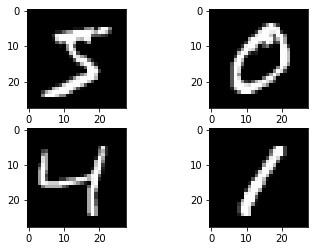

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

Since we have not yet studied Convolutional Neural Networks (AKA CNN), we would like to solve this problem by using Multi-Layer Perceptrons. 

Note that our data is two-dimensional and since we are not using CNNs, we should reshape our data to make it compatible for MLPs. In the following code cell convert the input shape to a vector of pixels.

In [3]:
# Reshape the test and training datasets 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Normalizing data

X_train = X_train / 255
X_test = X_test / 255

Now since our problem is a multi-class classification problem we should label our data from 0 to 9 (there are 10 handwritten digits). We can simply do this using keras's built-in to_categorical() function.

In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print(num_classes)

10


## Defining Our Custom Optimizer

This is the main part of this assignment because you are going to implement your custom optimizer. 

Below you should implement the SGD algorithm that you have learned in class. The class inherits from the Optimizer class in Keras. So all you need to do is to overwrite the functions specified below to have your own custom optimizer. 

In the constructor section you should define your hyperparameters and in resource_apply_dence function you write your main algorithm for optimizing.

You can visit [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer) to get further information on how to implement your own optimizer in tensorflow.

In [7]:
class CustomSGD(Optimizer):
  def __init__(self, learning_rate=0.01, name="CustomSGD", **kwargs):
      """you can set and store your hyper-parameters here"""
      super().__init__(name, **kwargs)
      """Define learning rate hyper param here"""
      self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
      self._set_hyper("decay", self._initial_decay)



  @tf.function
  def _resource_apply_dense(self, grad, var):
      """ This is where you implement SGD algorithm with decayed learning rate """
      var_dtype = var.dtype.base_dtype
      lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
      var.assign_add(-grad * lr_t)

  def _resource_apply_sparse(self, grad, var):
      """ No need to do anything here """
      raise NotImplementedError

  def get_config(self):
      base_config = super().get_config()
      return {
          **base_config,
          "learning_rate": self._serialize_hyperparameter("learning_rate"),
          "decay": self._serialize_hyperparameter("decay"),
      }

## Creating Our Model

In this section we will create our model. You only need dense layers and don't forget to use your custom SGD. Also try changing the learning rate of the optimizer and analyze the effect of the learning rate on your model's performance.

In [8]:
hidden_units = 128

In [9]:
def mlp_model(lrn_rate):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape = X_train[0].shape))
  model.add(keras.layers.Dense(units=hidden_units, activation='relu'))
  model.add(keras.layers.Dense(units=10, activation='softmax'))

  model.compile(optimizer=CustomSGD(learning_rate=lrn_rate), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [10]:
lrn_rates = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Now run the following code cell to train and evaluate our model.

In [19]:
for lrn_rate in lrn_rates:
  model = mlp_model(lrn_rate)

  # Fit the model
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print()
  print("Model Error for learning_rate %s: %.2f%%" % (lrn_rate, 100-scores[1]*100))
  print('##########################################################################################')
  print()

Epoch 1/10
300/300 - 2s - loss: 2.3238 - accuracy: 0.1171 - val_loss: 2.1670 - val_accuracy: 0.2272
Epoch 2/10
300/300 - 1s - loss: 2.0494 - accuracy: 0.3670 - val_loss: 1.9327 - val_accuracy: 0.4775
Epoch 3/10
300/300 - 1s - loss: 1.8351 - accuracy: 0.5452 - val_loss: 1.7275 - val_accuracy: 0.5975
Epoch 4/10
300/300 - 1s - loss: 1.6436 - accuracy: 0.6313 - val_loss: 1.5435 - val_accuracy: 0.6608
Epoch 5/10
300/300 - 1s - loss: 1.4739 - accuracy: 0.6885 - val_loss: 1.3827 - val_accuracy: 0.7141
Epoch 6/10
300/300 - 1s - loss: 1.3274 - accuracy: 0.7297 - val_loss: 1.2458 - val_accuracy: 0.7538
Epoch 7/10
300/300 - 1s - loss: 1.2036 - accuracy: 0.7621 - val_loss: 1.1312 - val_accuracy: 0.7819
Epoch 8/10
300/300 - 1s - loss: 1.1003 - accuracy: 0.7828 - val_loss: 1.0362 - val_accuracy: 0.7996
Epoch 9/10
300/300 - 1s - loss: 1.0147 - accuracy: 0.7985 - val_loss: 0.9574 - val_accuracy: 0.8133
Epoch 10/10
300/300 - 1s - loss: 0.9434 - accuracy: 0.8105 - val_loss: 0.8918 - val_accuracy: 0.8224